In [1]:
import numpy as np 
import pandas as pd
import tensorflow 
import matplotlib.pyplot as plt 
import seaborn as sns 

---------------------------
# 2- CiFar10 Classifier

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

`Classes:
airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9`

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[50] # truck

array([9], dtype=uint8)

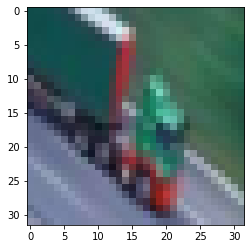

In [7]:
plt.imshow(X_train[50])

In [8]:
# check if the data is scaled or not 
X_train[50].max()

243

In [9]:
# feature scaling 
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[50].max()

0.9529411764705882

In [11]:
# convert the labels to classes using one-hot-encoding method
from tensorflow.keras.utils import to_categorical

example = to_categorical(y_train)

In [12]:
example[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [14]:
y_cat_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## Start building the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [18]:
# create the early stop before training
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [20]:
# training 
model.fit(X_train, y_cat_train, epochs = 15, validation_data = (X_test, y_cat_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 44s 881us/sample - loss: 1.5297 - accuracy: 0.4504 - val_loss: 1.2911 - val_accuracy: 0.5432
Epoch 2/15
50000/50000 [==============================] - 47s 937us/sample - loss: 1.1736 - accuracy: 0.5873 - val_loss: 1.1163 - val_accuracy: 0.6072
Epoch 3/15
50000/50000 [==============================] - 50s 1ms/sample - loss: 1.0223 - accuracy: 0.6460 - val_loss: 1.0307 - val_accuracy: 0.6399
Epoch 4/15
50000/50000 [==============================] - 49s 970us/sample - loss: 0.9079 - accuracy: 0.6872 - val_loss: 0.9807 - val_accuracy: 0.6547
Epoch 5/15
50000/50000 [==============================] - 49s 989us/sample - loss: 0.8234 - accuracy: 0.7177 - val_loss: 1.0546 - val_accuracy: 0.6468
Epoch 6/15
50000/50000 [==============================] - 49s 979us/sample - loss: 0.7548 - accuracy: 0.7417 - val_loss: 1.0593 - val_accuracy: 0.6606
Epoch 7/15
50000/50000 [======================

In [26]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.529676,0.45040,1.291114,0.5432
1,1.173613,0.58728,1.116256,0.6072
2,1.022330,0.64602,1.030687,0.6399
3,0.907891,0.68720,0.980682,0.6547
4,0.823382,0.71766,1.054629,0.6468
5,0.754799,0.74166,1.059276,0.6606
6,0.697876,0.76066,0.978701,0.6756
7,0.648537,0.78018,1.020977,0.6779
8,0.612546,0.79316,1.069887,0.6825
9,0.579706,0.80422,1.143722,0.6418


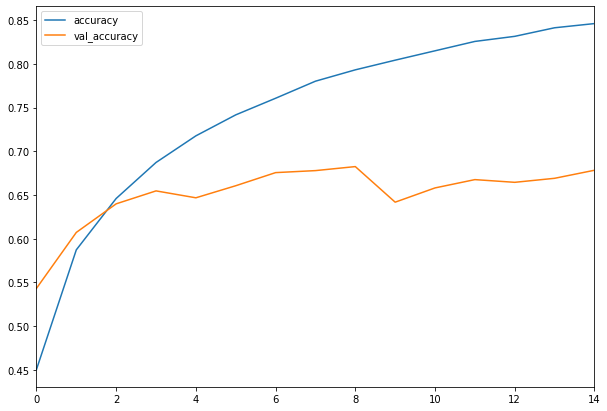

In [27]:
losses[["accuracy" , "val_accuracy"]].plot(figsize = (10,7))

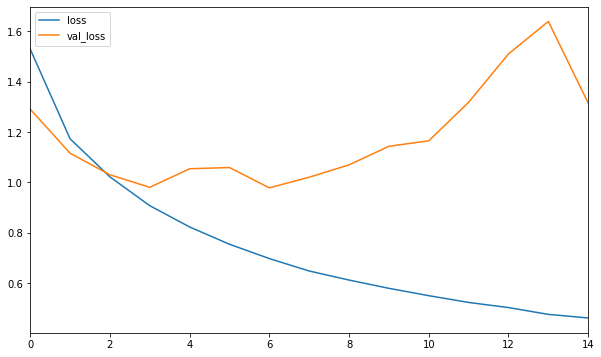

In [28]:
losses[["loss", "val_loss"]].plot(figsize = (10,6))

In [21]:
image = X_test[16]

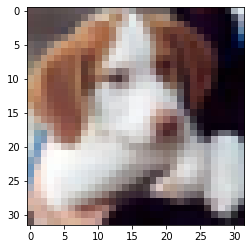

In [22]:
plt.imshow(image)

In [23]:
image.shape

(32, 32, 3)

In [25]:
model.predict_classes(image.reshape((1,32,32,3)))

array([5], dtype=int64)

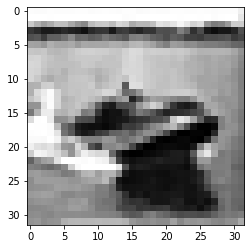

In [29]:
image = X_test[150] #ship

plt.imshow(image)

In [31]:
y_test[150] # ship

array([8], dtype=uint8)

In [32]:
model.predict_classes(image.reshape(1,32,32,3))

array([8], dtype=int64)

In [34]:
# try more than one image 
y_test[:20]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1],
       [0],
       [9],
       [5],
       [7],
       [9],
       [8],
       [5],
       [7],
       [8],
       [6]], dtype=uint8)

In [37]:
p = model.predict_classes(X_test[:20])
p

array([8, 8, 8, 0, 4, 6, 1, 6, 7, 8, 8, 9, 4, 7, 9, 8, 5, 7, 8, 6],
      dtype=int64)